# Positronium experience

In this lab experience, we are going to measure the orto Positronium, which is characterized by a mean life time of 142 ns, due to its forbidden decay in 3 gamma photons. The ortho-positronium, with respect to para-positronium, has both the electron and the positron with the same spin (both up or down).

#### Positronium source

The positronium is produced by bombarding an insulator with positron emitted by a $\beta^+$ source (Na22). Insulator is composed by Silicon  p-typewith regular nanochannels

#### Positron moderator

To select only positrons with a certain energy and angle. In W.

#### ...

#### Detector

HPGe -High Purity Germanium Detector: slow detector but very good energy resolution -> detects gamma rays

From the spectrum: measure the areas of the plateau (valley area, contribution of the ortho positronium annihilation) and of the peak (peak area, contribution of the para positronium annihilation and of the pick-off of the ortho-Ps). From them: $$R_F = \frac{\text{Valley Area}}{\text{Peak Area}} = \frac{V}{P}$$

## Calibration with Ba133/Na22

In [1]:
TString fname="DATA/133Ba_22Na.asc";
TTree* tree = new TTree("tree","data from ascii file");
tree->ReadFile(fname,"E/F");

//tree->Print();
int n = tree->GetEntries();
cout<<n;

8192

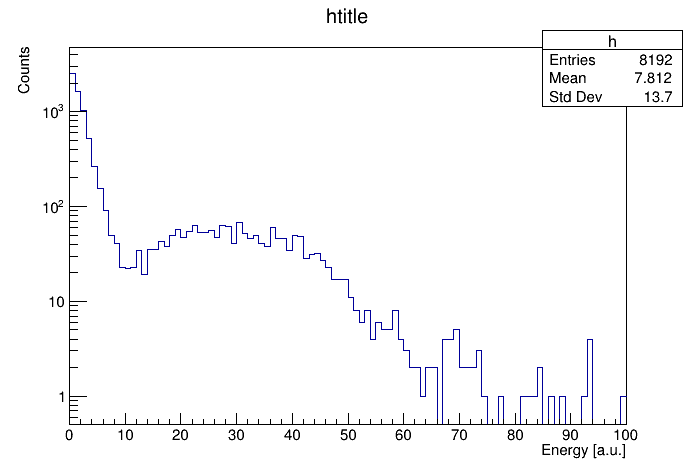

In [2]:
TCanvas *c1 = new TCanvas();
TH1F *h = new TH1F("h","htitle",100,0,100); // crea “h”
double E[8192];
for (int i=0; i<n; i++) { // riempie con i dati
    E[i] = tree->GetEntry(i);
    h->Fill(E[i]);
}
tree->Draw("E>>h");
gPad->SetLogy();
h->GetXaxis()->SetTitle("Energy [a.u.]");
h->GetYaxis()->SetTitle("Counts");

c1->Draw();

## Calibration with Lu176

In [3]:
TString fnameLu="DATA/176Lu.asc";
TTree* treeLu = new TTree("treeLu","data from ascii file");
treeLu->ReadFile(fnameLu,"ELu/F");

//tree->Print();
int n = treeLu->GetEntries();
cout<<n;

8192

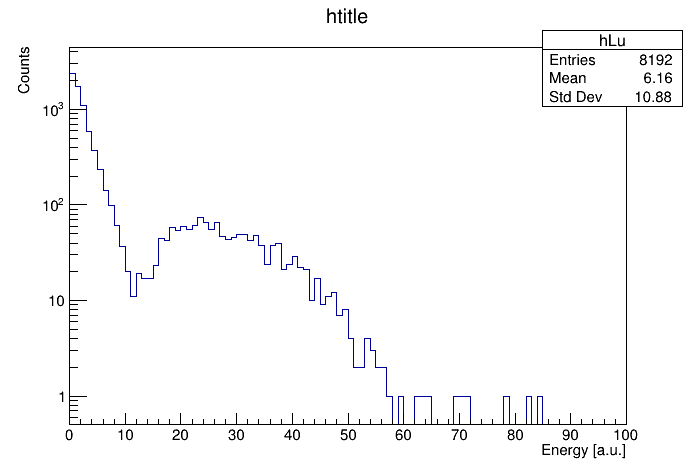

In [4]:
TCanvas *c1Lu = new TCanvas();
TH1F *hLu = new TH1F("hLu","htitle",100,0,100); // crea “h”
double ELu[8192];
for (int i=0; i<n; i++) { // riempie con i dati
    ELu[i] = treeLu->GetEntry(i);
    hLu->Fill(ELu[i]);
}
treeLu->Draw("ELu>>hLu");
gPad->SetLogy();
hLu->GetXaxis()->SetTitle("Energy [a.u.]");
hLu->GetYaxis()->SetTitle("Counts");

c1Lu->Draw();

## Calibration with LYSO

From the data, we plot the ratio $\frac{P}{V}$ in function of the energy, and we fit it with the curve $$R = P/V = \frac{A}{1+\left(\frac{E}{E_0}\right)^{1.6}} + C$$

From $E_0$ it is possible to compute the mean depth at which positrums are implanted: $$\bar{z} = \frac{40}{\rho} E_0^{1.6} \,[nm]$$ 
where 40 is an experimental given parameter and $\rho$ is the density of the silicium: $\rho = 2.3$ g/cm$^3$.

It is useful to know also $C$ which is the plateau at small energies and it is linked to the ortopositronium.

In [5]:
TString Fname="DATA/20m100Ae_A.dat";
TTree* tree = new TTree("tree","data from ascii file");
tree->ReadFile(Fname,"ADC/I:Tn/F:Tf/F:E/F:DV/F:Rep/F:SBA/F:SNA/F:W/F:PV/F:FWHMBA/F:FWHMNA/F:SLOPE/F:SURFNA/F:PkNa/F:Analysis/I");

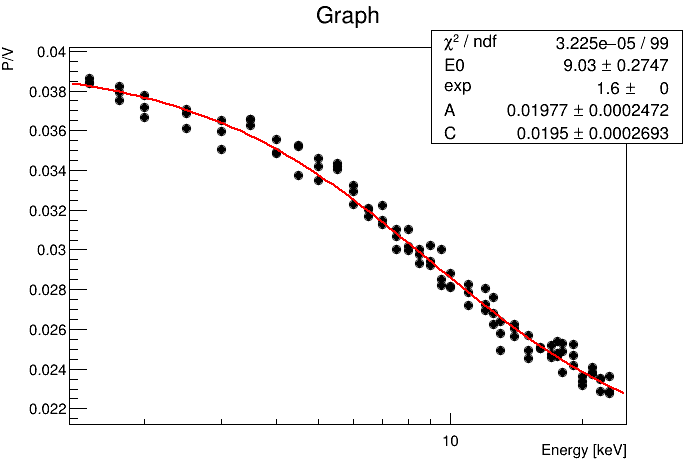


****************************************
Minimizer is Minuit / Migrad
Chi2                      =  3.22515e-05
NDf                       =           99
Edm                       =   2.7279e-07
NCalls                    =           76
E0                        =      9.03023   +/-   0.274654    
exp                       =          1.6                      	 (fixed)
A                         =    0.0197694   +/-   0.000247241 
C                         =    0.0195043   +/-   0.000269349 
Mean depth: (588.099+-28.6192) nm
A: 0.0197694+-0.000247241
A+C: 0.0392737+-0.000365619


In [6]:
TCanvas *c1 = (TCanvas*) gROOT->FindObject("c1");
if (c1) delete c1;
c1 = new TCanvas("c1","canvas");

tree->Draw("PV:E","","goff");
TGraph* gra = new TGraph(tree->GetSelectedRows(),tree->GetV2(),tree->GetV1());
gra->Draw("ap");
gra->SetMarkerStyle(8);
gra->SetLineWidth(2);
gPad->SetLogx();

TF1* fpos = new TF1("fpos","[2]/(1+pow(x/[0],[1]))+[3]",0,30);
fpos->SetParameter(0,5);
fpos->FixParameter(1,1.6);
fpos->SetParameter(2,0.04);
fpos->SetParameter(3,0.01);
fpos->SetParNames("E0","exp","A","C");
gra->Fit("fpos");
gra->GetXaxis()->SetTitle("Energy [keV]");
gra->GetYaxis()->SetTitle("P/V");
gStyle->SetOptFit(1);
c1->Draw();

double E0=fpos->GetParameter(0);
double dE0=fpos->GetParError(0);
double da2=fpos->GetParError(2);                         
double da3=fpos->GetParError(3);                         
cout<<"Mean depth: ("<<pow(E0,1.6)*40/2.3<<"+-"<<1.6*pow(E0,0.6)*40/2.3*dE0<<") nm"<<endl;
cout<<"A: "<<fpos->GetParameter(2)<<"+-"<<fpos->GetParError(2)<<endl;
cout<<"A+C: "<<fpos->GetParameter(2)+fpos->GetParameter(3)<<"+-"<<sqrt(da2*da2+da3*da3)<<endl;

In [7]:

////     error ///////
TCanvas *c2 = (TCanvas*) gROOT->FindObject("c2");
if (c2) delete c2;
c2 = new TCanvas("c2","canvas");

tree->Draw(Form("sig*%e:ene:(esig)*%e:ene*0.001",1/p1,1/p1),"","goff");
TGraphErrors* gra2 = new TGraphErrors(tree->GetSelectedRows(),tree->GetV2(),tree->GetV1(),tree->GetV4(),tree->GetV3());
gra2->Draw("ap");
gra2->SetMarkerStyle(8);
gra2->SetLineWidth(2);
TF1* fsig = new TF1("fsig","sqrt([1]*[1]*x+[0]*[0])",0,1500);
fsig->SetParameter(0,10);
fsig->SetParameter(1,5);

gra2->Fit("fsig");
gra2->GetXaxis()->SetTitle("Energy [keV]");
gra2->GetYaxis()->SetTitle("#sigma [keV]");
c2->Draw();

cout << "expected sigma@ 662 keV = " << fsig->Eval(662) << endl;
cout << "expected sigma@ 59.5 keV = " << fsig->Eval(59.5) << endl;

cout << "Alias ENaI1 " << Form("(-A2+%e)*%e",-p0,1./p1) << endl;


input_line_102:2:88: error: use of undeclared identifier 'p1'
 (((*(class TTree **)0x7f30f846a088))->Draw(Form("sig*%e:ene:(esig)*%e:ene*0.001", 1 / p1, 1 / p1), "", "goff"))
                                                                                       ^
input_line_102:2:96: error: use of undeclared identifier 'p1'
 (((*(class TTree **)0x7f30f846a088))->Draw(Form("sig*%e:ene:(esig)*%e:ene*0.001", 1 / p1, 1 / p1), "", "goff"))
                                                                                               ^
Error in <HandleInterpreterException>: Error evaluating expression (((*(class TTree **)0x7f30f846a088))->Draw(Form("sig*%e:ene:(esig)*%e:ene*0.001", 1 / p1, 1 / p1), "", "goff")).
Execution of your code was aborted.
